In [2]:
# Import necessary libraries and packages
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [9]:
# Load the dataset
df= pd.read_csv("../data/model_raw_data_short.csv")

# View the data
df.head()

,dateDailyStockValue,symbolDailyStockValue,openDailyStockValue,highDailyStockValue,lowDailyStockValue,closeDailyStockValue,volumeDailyStockValue,changeDailyStockValue,changePercentDailyStockValue,vwapDailyStockValue,...,operatingIncomeQuaterlyIncome,netIncomeQuaterlyIncome,epsQuaterlyIncome,weightedAverageShsOutQuaterlyIncome,totalAssetsYearlyBalanceSheet,totalDebtYearlyBalanceSheet,totalEquityYearlyBalanceSheet,operatingCashFlowYearlyCashFlow,capitalExpenditureYearlyCashFlow,freeCashFlowYearlyCashFlow
0,2010-01-04,NVDA,0.46275,0.4655,0.45275,0.46225,800352640,-0.0005,-0.10805,0.46081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,SMCI,1.13000,1.1600,1.11000,1.15000,1396000,0.0250,1.77000,1.13750,...,12367000.0,7604000.0,0.021,3.553908e+08,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,CMG,1.79000,1.7900,1.74000,1.76000,15695000,-0.0352,-1.96000,1.77000,...,50385000.0,31596000.0,0.020,1.574150e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,FTNT,1.79000,1.8200,1.76000,1.80000,3580000,0.0100,0.55866,1.79000,...,7454000.0,43940000.0,0.065,6.718100e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-04,AVGO,1.83000,1.8900,1.80000,1.89000,5387000,0.0560,3.28000,1.85250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Explore the data
print("Dataset Shape:", df.shape)
print("Dataset Info:", df.info)
print("Dataset Describe:", df.describe)
print("Check for Missing Values:", df.isnull().sum())

Dataset Shape: (1817455, 28)
Dataset Info: <bound method DataFrame.info of         dateDailyStockValue symbolDailyStockValue  openDailyStockValue  \
0                2010-01-04                  NVDA              0.46275   
1                2010-01-04                  SMCI              1.13000   
2                2010-01-04                   CMG              1.79000   
3                2010-01-04                  FTNT              1.79000   
4                2010-01-04                  AVGO              1.83000   
...                     ...                   ...                  ...   
1817450          2025-01-22                   TPL           1431.61000   
1817451          2025-01-22                  FICO           1918.09000   
1817452          2025-01-22                   AZO           3301.64000   
1817453          2025-01-22                  BKNG           4681.56000   
1817454          2025-01-22                   NVR           8296.60000   

         highDailyStockValue  lowDai

Distribution of the target variable:


<Axes: >

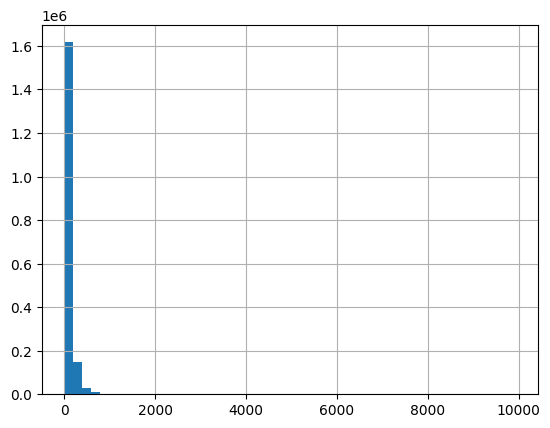

In [13]:
# Distribution of the target variable
print("Distribution of the target variable:")
df['closeDailyStockValue'].hist(bins=50)

In [14]:
# Columns that are completely NaN
cols_completely_nan = [
    'closeDailyStockValue1Day',
    'closeDailyStockValue7Day',
    'closeDailyStockValue30Day',
    'closeDailyStockValue90Day'
]

# Drop these columns
df.drop(cols_completely_nan, axis=1, inplace=True)

# Verify they are removed
print("Columns after dropping completely NaN ones:")
print(df.columns)


Columns after dropping completely NaN ones:
Index(['dateDailyStockValue', 'symbolDailyStockValue', 'openDailyStockValue',
       'highDailyStockValue', 'lowDailyStockValue', 'closeDailyStockValue',
       'volumeDailyStockValue', 'changeDailyStockValue',
       'changePercentDailyStockValue', 'vwapDailyStockValue',
       'year20InterestRates', 'revenueQuaterlyIncome',
       'grossProfitQuaterlyIncome', 'ebitdaQuaterlyIncome',
       'operatingIncomeQuaterlyIncome', 'netIncomeQuaterlyIncome',
       'epsQuaterlyIncome', 'weightedAverageShsOutQuaterlyIncome',
       'totalAssetsYearlyBalanceSheet', 'totalDebtYearlyBalanceSheet',
       'totalEquityYearlyBalanceSheet', 'operatingCashFlowYearlyCashFlow',
       'capitalExpenditureYearlyCashFlow', 'freeCashFlowYearlyCashFlow'],
      dtype='object')


In [15]:
# Handle columns with large amounts of missing data
threshold = 0.5  # drop columns with more than 50% missing
n_rows = len(df)
cols_to_drop = [col for col in df.columns if df[col].isnull().sum() / n_rows > threshold]

df.drop(cols_to_drop, axis=1, inplace=True)
print("Columns after threshold-based drop:")
print(df.columns)


Columns after threshold-based drop:
Index(['dateDailyStockValue', 'symbolDailyStockValue', 'openDailyStockValue',
       'highDailyStockValue', 'lowDailyStockValue', 'closeDailyStockValue',
       'volumeDailyStockValue', 'changeDailyStockValue',
       'changePercentDailyStockValue', 'vwapDailyStockValue',
       'year20InterestRates', 'revenueQuaterlyIncome',
       'grossProfitQuaterlyIncome', 'ebitdaQuaterlyIncome',
       'operatingIncomeQuaterlyIncome', 'netIncomeQuaterlyIncome',
       'epsQuaterlyIncome', 'weightedAverageShsOutQuaterlyIncome'],
      dtype='object')


In [16]:
# Check overall dataset information
df.info()

# Get summary statistics for numeric columns
df.describe()

# Check for remaining missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817455 entries, 0 to 1817454
Data columns (total 18 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   dateDailyStockValue                  object 
 1   symbolDailyStockValue                object 
 2   openDailyStockValue                  float64
 3   highDailyStockValue                  float64
 4   lowDailyStockValue                   float64
 5   closeDailyStockValue                 float64
 6   volumeDailyStockValue                int64  
 7   changeDailyStockValue                float64
 8   changePercentDailyStockValue         float64
 9   vwapDailyStockValue                  float64
 10  year20InterestRates                  float64
 11  revenueQuaterlyIncome                float64
 12  grossProfitQuaterlyIncome            float64
 13  ebitdaQuaterlyIncome                 float64
 14  operatingIncomeQuaterlyIncome        float64
 15  netIncomeQuaterlyIncome         

dateDailyStockValue                         0
symbolDailyStockValue                       0
openDailyStockValue                         0
highDailyStockValue                         0
lowDailyStockValue                          0
closeDailyStockValue                        0
volumeDailyStockValue                       0
changeDailyStockValue                       0
changePercentDailyStockValue                0
vwapDailyStockValue                         0
year20InterestRates                     13558
revenueQuaterlyIncome                  407424
grossProfitQuaterlyIncome              407424
ebitdaQuaterlyIncome                   407424
operatingIncomeQuaterlyIncome          407424
netIncomeQuaterlyIncome                407424
epsQuaterlyIncome                      407424
weightedAverageShsOutQuaterlyIncome    407424
dtype: int64

In [18]:
# Convert datetime column
df['dateDailyStockValue'] = pd.to_datetime(df['dateDailyStockValue'])
print("Converted dateDailyStockValue to datetime.")

Converted dateDailyStockValue to datetime.


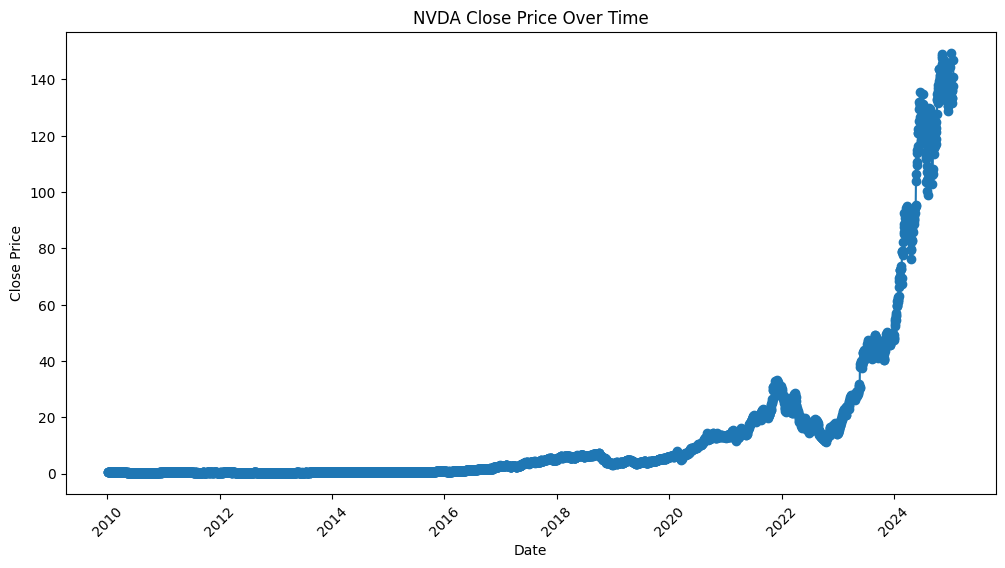

In [19]:
# Time-series plot of example stock
df_nvda = df[df['symbolDailyStockValue'] == 'NVDA'].copy()

# If it's encoded numerically, adjust accordingly.
df_nvda.sort_values('dateDailyStockValue', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df_nvda['dateDailyStockValue'], df_nvda['closeDailyStockValue'], marker='o', linestyle='-')
plt.title("NVDA Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()


In [20]:
# Apply log transform to 'closeDailyStockValue'
df['log_close'] = np.log1p(df['closeDailyStockValue'])

In [21]:
# Convert 'singleStockDailyValue' into numeric code
df['symbol_code'] = df['symbolDailyStockValue'].astype('category').cat.codes

In [23]:
# Drop rest of missing values
cols_to_drop = [
    'year20InterestRates',
    'revenueQuaterlyIncome',
    'grossProfitQuaterlyIncome',
    'ebitdaQuaterlyIncome',
    'operatingIncomeQuaterlyIncome',
    'netIncomeQuaterlyIncome',
    'epsQuaterlyIncome',
    'weightedAverageShsOutQuaterlyIncome'
]
df.drop(cols_to_drop, axis=1, inplace=True)


In [25]:
# Additional features
df['MA_7'] = df['closeDailyStockValue'].rolling(window=7).mean()

In [27]:
# Save cleaned dataset
df.to_csv("../data/cleaned_stock_data.csv", index=False)
